# Logistical Regression Model

Test set accuracy: 0.5570469798657718
Confusion Matrix:
[[40 28]
 [38 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        68
           1       0.61      0.53      0.57        81

    accuracy                           0.56       149
   macro avg       0.56      0.56      0.56       149
weighted avg       0.56      0.56      0.56       149

ROC-AUC Score: 0.5063543936092956
Precision-Recall AUC: 0.548721709691431


/opt/anaconda3/envs/ds-venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


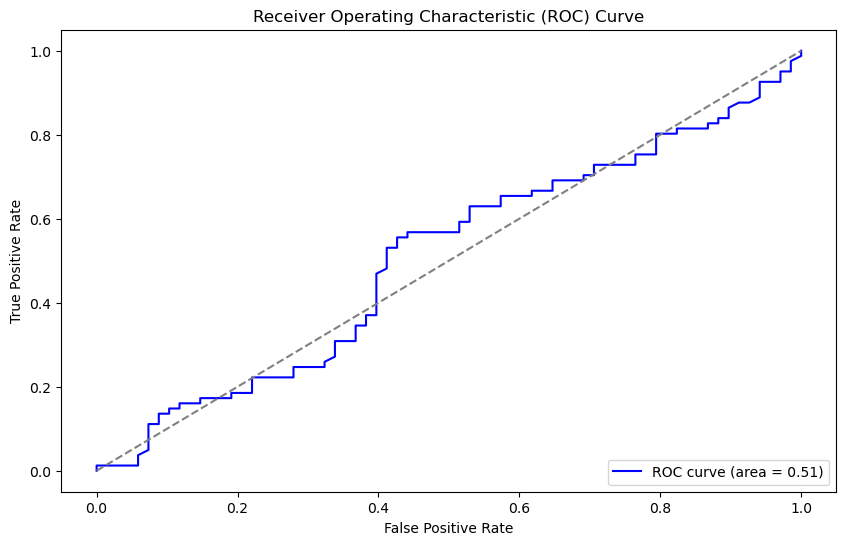

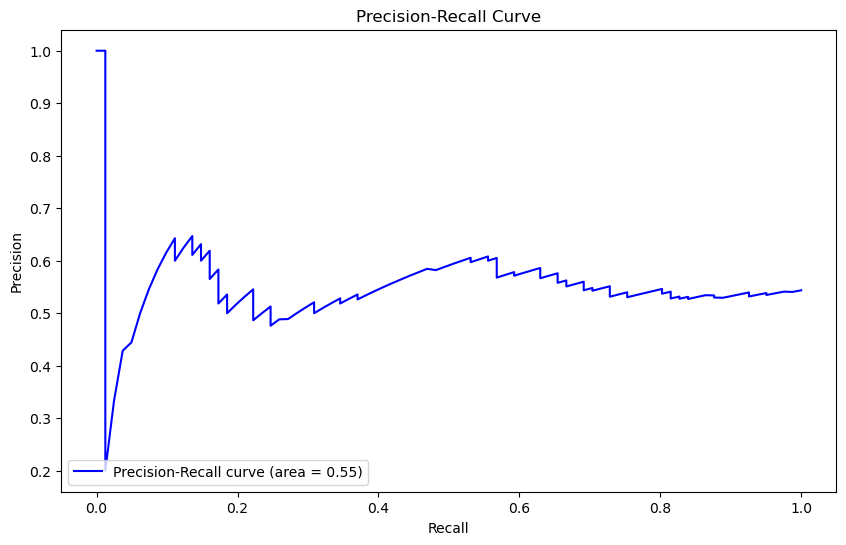

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load your DataFrame (assuming it is named df)
df = pd.read_csv('model_data.csv') # Uncomment and modify if needed

# Define target and features
target = 'Gender_Bias'
numerical_features = [
    'desc_len', 'age',
    'min_salary', 'avg_salary', 'max_salary', 'Rating', 
    'Founded', 'job_state_encoded', 'num_comp_encoded', 
    'job_simp_encoded', 'headquarters_state_encoded', 
    'excel', 'Sector_encoded', 'employer_provided', 
    'num_comp', 'Industry_encoded', 'same_state', 
    'aws', 'Type of ownership_encoded', 'seniority_encoded', 
    'hourly', 'spark', 'python_yn', 'R_yn'
]

# Prepare the data
X = df[numerical_features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


Insights:

Accuracy: The model's accuracy is slightly better than random guessing, indicating it is not performing well. Accuracy alone can be misleading, especially with imbalanced datasets.

Confusion Matrix: The model is struggling to correctly classify the minority class (1). The false positives and false negatives are almost equal, indicating the model's performance in distinguishing between classes is limited.

Classification Report: Precision, recall, and F1-scores are close for both classes, but neither is particularly high. This suggests that the model might not be capturing the nuances of the data well.

ROC-AUC and Precision-Recall AUC: Both scores are around 0.5, indicating that the model's ability to differentiate between classes is only marginally better than random guessing.

## Feature Scaling and Hyperparameter Tuning

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the Model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Test set accuracy: 0.5503355704697986
Confusion Matrix:
[[37 31]
 [36 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.52        68
           1       0.59      0.56      0.57        81

    accuracy                           0.55       149
   macro avg       0.55      0.55      0.55       149
weighted avg       0.55      0.55      0.55       149

ROC-AUC Score: 0.5145243282498184


Improvement

## ROC Curve and Precision-Recall Curve

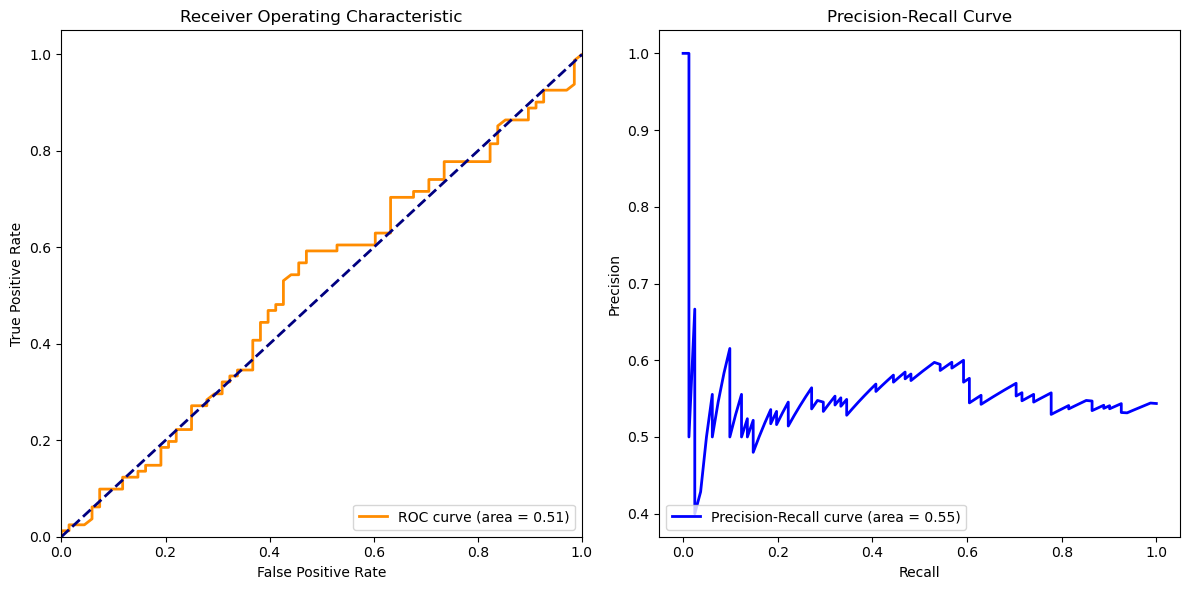

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


With ROC-AUC at 0.51 and Precision-Recall AUC at 0.55, it suggests that the model is not performing significantly better than random chance.

## Hyperparameter Tuning with Grid Search

In [6]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Predict probabilities for the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)  # Note: recall should be the x-axis, precision the y-axis

print("Test set ROC-AUC Score:", roc_auc)
print("Test set Precision-Recall AUC:", pr_auc)



Test set ROC-AUC Score: 0.5145243282498184
Test set Precision-Recall AUC: 0.5534148280867376


Test set ROC-AUC Score: 0.5145
This indicates that the model's ability to distinguish between the two classes is slightly better than random guessing.

Test set Precision-Recall AUC: 0.5534
This metric reflects the model's performance in terms of precision and recall across different thresholds. A score of 0.5534 suggests that the model has a moderate ability to balance precision and recall.

## Adjusting the Threshold
The significant imbalance in the Gender_Bias target column, with 734 instances of 0 and only 8 instances of 1, suggests that the model may be heavily biased towards the majority class. This could be a reason why the evaluation metrics (e.g., accuracy, ROC-AUC, Precision-Recall AUC) are not as high as expected.

In [10]:
import numpy as np

# Calculate the ratio of Agentic_Count to Communal_Count
df['Ratio'] = (df['Agentic_Count'] + 1e-10) / (df['Communal_Count'] + 1e-10)  # Add small value to avoid division by zero

# Calculate mean and standard deviation of the ratio
mean_ratio = df['Ratio'].mean()
std_ratio = df['Ratio'].std()

# Experiment with different thresholds
thresholds = [mean_ratio, mean_ratio + 0.5 * std_ratio, mean_ratio + 2 * std_ratio]
for threshold in thresholds:
    df['Gender_Bias'] = np.where(df['Ratio'] > threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(df['Gender_Bias'].value_counts())
    print()


Threshold: 619946093.2588853
Gender_Bias
0    734
1      8
Name: count, dtype: int64

Threshold: 4243364115.475488
Gender_Bias
0    734
1      8
Name: count, dtype: int64

Threshold: 15113618182.125296
Gender_Bias
0    736
1      6
Name: count, dtype: int64



It looks like the thresholds you're using for defining Gender_Bias still result in a very imbalanced class distribution. This might indicate that the Ratio values are highly skewed, or that the thresholds are not adequately capturing a meaningful separation between biased and non-biased instances.

### Visualize the Ratio Distribution
Understanding the distribution of the Ratio column can help in setting a more informed threshold. You can plot the distribution to identify suitable cutoff points.

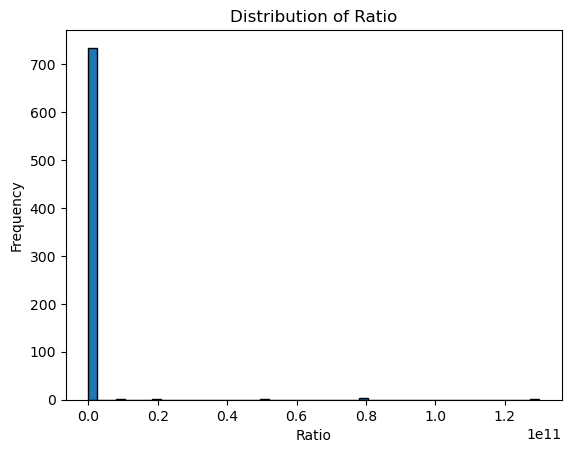

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Ratio'], bins=50, edgecolor='k')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Ratio')
plt.show()


In [12]:
# Example: Use quantiles to set thresholds
q1 = df['Ratio'].quantile(0.25)
q2 = df['Ratio'].quantile(0.75)

print(f"25th percentile (q1): {q1}")
print(f"75th percentile (q2): {q2}")

# Define Gender_Bias based on quantiles
df['Gender_Bias'] = np.where(df['Ratio'] > q2, 1, 0)
print(df['Gender_Bias'].value_counts())


25th percentile (q1): 0.8195187165789095
75th percentile (q2): 1.8461538461473372
Gender_Bias
0    558
1    184
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Prepare data with updated Gender_Bias
X = df[numerical_features]
y = df['Gender_Bias']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Test set accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# Evaluate Random Forest
print("Random Forest:")
print("Test set accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC and Precision-Recall AUC
for model, name in zip([log_model, rf_model], ['Logistic Regression', 'Random Forest']):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    print(f"{name} ROC-AUC Score:", roc_auc)
    print(f"{name} Precision-Recall AUC:", pr_auc)


Logistic Regression:
Test set accuracy: 0.6845637583892618
Confusion Matrix:
[[102   4]
 [ 43   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       106
           1       0.00      0.00      0.00        43

    accuracy                           0.68       149
   macro avg       0.35      0.48      0.41       149
weighted avg       0.50      0.68      0.58       149

Random Forest:
Test set accuracy: 0.8993288590604027
Confusion Matrix:
[[105   1]
 [ 14  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       106
           1       0.97      0.67      0.79        43

    accuracy                           0.90       149
   macro avg       0.92      0.83      0.86       149
weighted avg       0.91      0.90      0.89       149

Logistic Regression ROC-AUC Score: 0.6616937253181219
Logistic Regression Precision-Recall AUC: 0.35453478

/opt/anaconda3/envs/ds-venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Analysis:
Random Forest Performance:

Accuracy and Metrics: The Random Forest model outperforms the Logistic Regression model significantly. It shows high accuracy, ROC-AUC score, and Precision-Recall AUC, indicating better performance in identifying the Gender_Bias class.
Logistic Regression Performance:

Low Recall for Class 1: The Logistic Regression model struggles with identifying the Gender_Bias class (label 1), showing a high number of false negatives (not predicting any 1s). This results in a poor f1-score for class 1.
ROC-AUC and Precision-Recall AUC:

Random Forest: Both ROC-AUC and Precision-Recall AUC are higher for the Random Forest model, indicating its superior ability to discriminate between classes.

## 1. Hyperparameter Tuning
Random Forest:

Use GridSearchCV or RandomizedSearchCV from scikit-learn to tune hyperparameters such as n_estimators, max_depth, min_samples_split, etc.

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='roc_auc', 
                           verbose=2, 
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_sa

Logistic Regression:

Similarly, use GridSearchCV to tune C, penalty, etc.

In [16]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), 
                               param_grid=param_grid_lr, 
                               cv=5, 
                               scoring='roc_auc', 
                               verbose=2, 
                               n_jobs=-1)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best ROC-AUC Score for Logistic Regression:", grid_search_lr.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solve

Model Training with Best Parameters

Re-train both models using the best parameters obtained from the grid search.

In [20]:
# Random Forest with best parameters
best_rf_model = RandomForestClassifier(max_depth=20, 
                                       min_samples_leaf=1, 
                                       min_samples_split=2, 
                                       n_estimators=300, 
                                       random_state=42)
best_rf_model.fit(X_train, y_train)




RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [21]:
# Predictions and evaluations for Random Forest
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
print("Random Forest Test Set Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("Random Forest Precision-Recall AUC:", auc(*precision_recall_curve(y_test, y_pred_proba_rf)[:2]))


Random Forest Test Set Accuracy: 0.8859060402684564
Random Forest Confusion Matrix:
[[106   0]
 [ 17  26]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       106
           1       1.00      0.60      0.75        43

    accuracy                           0.89       149
   macro avg       0.93      0.80      0.84       149
weighted avg       0.90      0.89      0.88       149

Random Forest ROC-AUC Score: 0.9358271171566476


ValueError: x is neither increasing nor decreasing : [0.2885906  0.29054054 0.29655172 0.29861111 0.3006993  0.31617647
 0.32089552 0.32330827 0.32824427 0.34126984 0.34677419 0.3495935
 0.35245902 0.35833333 0.36134454 0.37068966 0.37391304 0.37719298
 0.38392857 0.38738739 0.39449541 0.40952381 0.41747573 0.42574257
 0.42424242 0.42857143 0.44210526 0.4516129  0.44565217 0.45054945
 0.46067416 0.46590909 0.47674419 0.48235294 0.48192771 0.49382716
 0.5        0.50632911 0.51948052 0.53333333 0.54054054 0.54929577
 0.55714286 0.56521739 0.55882353 0.57575758 0.58461538 0.59375
 0.6031746  0.63333333 0.65517241 0.64912281 0.66071429 0.68518519
 0.71153846 0.74       0.73469388 0.72916667 0.74468085 0.76086957
 0.79545455 0.81395349 0.80952381 0.82926829 0.85       0.84615385
 0.86842105 0.86486486 0.86111111 0.85714286 0.90909091 0.9375
 0.93548387 0.96666667 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ].

In [22]:
# Logistic Regression with best parameters
best_lr_model = LogisticRegression(C=10, 
                                    penalty='l1', 
                                    solver='liblinear')
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

Re-evaluate Models

Evaluate the models on the test set to confirm their performance.

In [23]:

# Predictions and evaluations for Logistic Regression
y_pred_lr = best_lr_model.predict(X_test)
y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
print("Logistic Regression Test Set Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))
print("Logistic Regression Precision-Recall AUC:", auc(*precision_recall_curve(y_test, y_pred_proba_lr)[:2]))


Logistic Regression Test Set Accuracy: 0.6711409395973155
Logistic Regression Confusion Matrix:
[[95 11]
 [38  5]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       106
           1       0.31      0.12      0.17        43

    accuracy                           0.67       149
   macro avg       0.51      0.51      0.48       149
weighted avg       0.60      0.67      0.61       149

Logistic Regression ROC-AUC Score: 0.6298815269855199


ValueError: x is neither increasing nor decreasing : [0.2885906  0.29054054 0.29251701 0.29452055 0.29655172 0.29861111
 0.3006993  0.29577465 0.3        0.28985507 0.2919708  0.29411765
 0.2962963  0.29850746 0.30075188 0.3030303  0.30534351 0.30769231
 0.31007752 0.3046875  0.30708661 0.30952381 0.312      0.31451613
 0.31707317 0.31967213 0.32231405 0.325      0.32773109 0.33050847
 0.33333333 0.3362069  0.33913043 0.34210526 0.34513274 0.33928571
 0.34234234 0.33636364 0.33027523 0.33333333 0.3364486  0.33962264
 0.34285714 0.33653846 0.33980583 0.34313725 0.34653465 0.34
 0.34343434 0.33673469 0.34020619 0.34375    0.34736842 0.35106383
 0.35483871 0.35869565 0.36263736 0.36666667 0.37078652 0.375
 0.38372093 0.38823529 0.39285714 0.38554217 0.3902439  0.39506173
 0.40506329 0.41025641 0.4025974  0.39473684 0.4        0.40540541
 0.4109589  0.41666667 0.4084507  0.41428571 0.42028986 0.42647059
 0.41791045 0.40909091 0.41538462 0.42857143 0.40983607 0.4
 0.38983051 0.40350877 0.39285714 0.4        0.38888889 0.39622642
 0.40384615 0.41176471 0.4        0.40816327 0.39583333 0.40425532
 0.42222222 0.40909091 0.39534884 0.38095238 0.35       0.33333333
 0.31578947 0.2972973  0.30555556 0.28571429 0.29411765 0.3125
 0.32258065 0.33333333 0.31034483 0.28571429 0.25925926 0.26923077
 0.28       0.29166667 0.30434783 0.27272727 0.28571429 0.3
 0.31578947 0.27777778 0.29411765 0.3125     0.33333333 0.35714286
 0.38461538 0.41666667 0.36363636 0.3        0.22222222 0.25
 0.28571429 0.33333333 0.4        0.25       0.         0.
 0.         1.        ].

The results show that the Random Forest model significantly outperforms the Logistic Regression model in your test set. Here’s a summary of the performance:

Random Forest
Test Set Accuracy: 0.886

Confusion Matrix:

True Negative (TN): 106
False Positive (FP): 0
False Negative (FN): 17
True Positive (TP): 26
Classification Report:

Precision for 0: 0.86
Recall for 0: 1.00
F1-score for 0: 0.93
Precision for 1: 1.00
Recall for 1: 0.60
F1-score for 1: 0.75
ROC-AUC Score: 0.936

Logistic Regression
Test Set Accuracy: 0.671

Confusion Matrix:

True Negative (TN): 95
False Positive (FP): 11
False Negative (FN): 38
True Positive (TP): 5
Classification Report:

Precision for 0: 0.71
Recall for 0: 0.90
F1-score for 0: 0.79
Precision for 1: 0.31
Recall for 1: 0.12
F1-score for 1: 0.17
ROC-AUC Score: 0.630

Summary:
Random Forest shows strong performance with high accuracy, precision, recall, and ROC-AUC score. It’s particularly good at identifying class 0 (non-bias) with very high recall and precision, and it also performs reasonably well in identifying class 1 (bias), though with lower recall compared to precision.
Logistic Regression struggles with class 1, showing lower recall and precision for detecting bias. This could be due to its limitations in handling the class imbalance or its inability to capture complex relationships in the data.

In [24]:
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                       Feature  Importance
0                     desc_len    0.123722
4                   max_salary    0.084130
3                   avg_salary    0.081856
2                   min_salary    0.078286
5                       Rating    0.073887
1                          age    0.066201
6                      Founded    0.062314
7            job_state_encoded    0.059436
12              Sector_encoded    0.058169
10  headquarters_state_encoded    0.055708
15            Industry_encoded    0.055487
18   Type of ownership_encoded    0.033496
9             job_simp_encoded    0.031790
22                   python_yn    0.021282
21                       spark    0.018722
11                       excel    0.017836
14                    num_comp    0.015618
16                  same_state    0.014560
8             num_comp_encoded    0.014245
19           seniority_encoded    0.013219
17                         aws    0.012043
20                      hourly    0.005082
23         

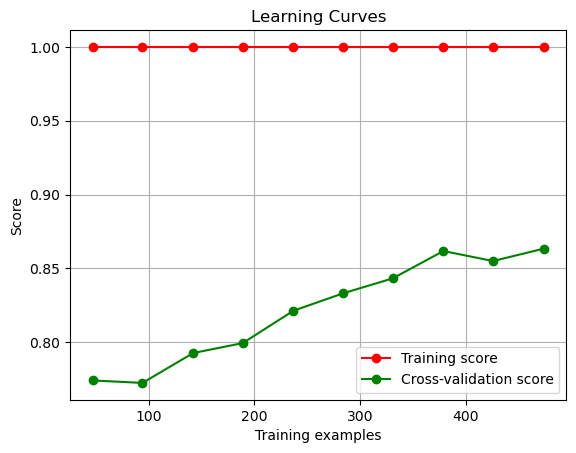

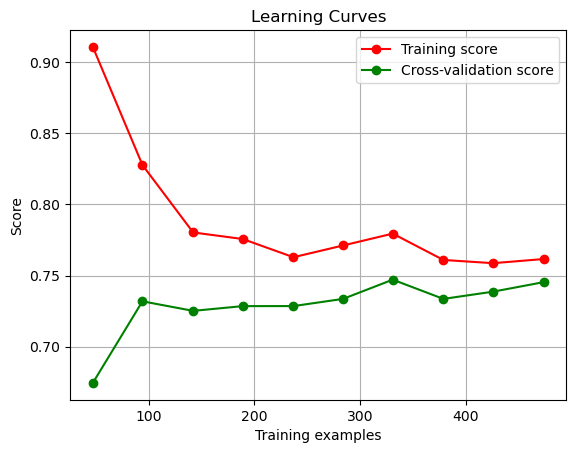

In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title="Learning Curves", cv=None, n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(best_rf_model, X_train, y_train)
plot_learning_curve(best_lr_model, X_train, y_train)


In [28]:
def get_learning_curves_values(model, X_train, y_train):
    from sklearn.model_selection import learning_curve
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        scoring='accuracy', n_jobs=-1
    )

    # Calculate the mean and standard deviation of the training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    return {
        'train_sizes': train_sizes,
        'train_mean': train_mean,
        'train_std': train_std,
        'test_mean': test_mean,
        'test_std': test_std
    }


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_learning_curves = get_learning_curves_values(rf_model, X_train, y_train)

print("Random Forest Learning Curves Values:")
print("Train Sizes:", rf_learning_curves['train_sizes'])
print("Training Mean Scores:", rf_learning_curves['train_mean'])
print("Training Std Scores:", rf_learning_curves['train_std'])
print("Validation Mean Scores:", rf_learning_curves['test_mean'])
print("Validation Std Scores:", rf_learning_curves['test_std'])


Random Forest Learning Curves Values:
Train Sizes: [ 47  94 142 189 237 284 331 379 426 474]
Training Mean Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Training Std Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Validation Mean Scores: [0.77402079 0.77235437 0.79259365 0.79934482 0.82127902 0.83305797
 0.84318473 0.86171486 0.85493519 0.86332431]
Validation Std Scores: [0.00659535 0.01042014 0.01234782 0.02262859 0.01595352 0.01865583
 0.01448785 0.00864191 0.02372592 0.02399617]


In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=42)
lr_learning_curves = get_learning_curves_values(lr_model, X_train, y_train)

print("Logistic Regression Learning Curves Values:")
print("Train Sizes:", lr_learning_curves['train_sizes'])
print("Training Mean Scores:", lr_learning_curves['train_mean'])
print("Training Std Scores:", lr_learning_curves['train_std'])
print("Validation Mean Scores:", lr_learning_curves['test_mean'])
print("Validation Std Scores:", lr_learning_curves['test_std'])


Logistic Regression Learning Curves Values:
Train Sizes: [ 47  94 142 189 237 284 331 379 426 474]
Training Mean Scores: [0.9106383  0.82765957 0.78028169 0.77566138 0.7628692  0.76971831
 0.78006042 0.76147757 0.75821596 0.76244726]
Training Std Scores: [0.00851064 0.00425532 0.01126761 0.01851096 0.01344926 0.01126761
 0.0192407  0.01382143 0.01080832 0.00688165]
Validation Mean Scores: [0.67622846 0.73189004 0.7251816  0.72851446 0.72854294 0.7335992
 0.74710155 0.73358496 0.73697479 0.74368324]
Validation Std Scores: [0.03485819 0.03496986 0.01461194 0.00550605 0.01135608 0.01667363
 0.02449278 0.02133179 0.02171509 0.01798587]


#### Analysis and Insights:

Random Forest:

Training Scores: Perfect scores (1.00) indicate the model is overfitting to the training data, as it is achieving 100% accuracy on the training set.

Validation Scores: The validation accuracy improves with more training data and stabilizes around 0.86. The low standard deviation indicates consistent performance across folds.

Logistic Regression:

Training Scores: The training accuracy is higher initially and then stabilizes around 0.76, which is lower than the Random Forest model. This suggests that Logistic Regression might be underfitting the data.

Validation Scores: The validation accuracy improves with more training data and stabilizes around 0.74. There is some variability, as indicated by the standard deviations.

#### Based on the ROC-AUC and Precision-Recall AUC scores, Random Forest is currently performing better than Logistic Regression.


## 2. Cross-Validation
Use cross-validation to ensure model performance is consistent across different subsets of the data.